# Downloading Data

In [0]:
# installing package to fix certain images that are rotated
! sudo apt install imagemagick -y

In [0]:
# downloading a extracting images
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz
!wget https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz
!tar -xzf GroceryDataset_part1.tar.gz
!tar -xzf GroceryDataset_part2.tar.gz

In [0]:
# creating required folders
! mkdir data/
! mkdir data/images/
! mkdir data/images/detector
! mkdir data/images/detector/eval
! mkdir data/images/detector/train
! mkdir pack_detector/
! mkdir pack_detector/data/
! mkdir pack_detector/models/
! mkdir pack_detector/models/ssd_mobilenet
! mkdir pack_detector/models/ssd_mobilenet/train
! mkdir pack_detector/models/ssd_mobilenet/eval

In [0]:
# moving all images to data/images/
! mv BrandImages data/images/
! mv BrandImagesFromShelves data/images/
! mv ProductImages data/images/
! mv ProductImagesFromShelves data/images/
! mv ShelfImages data/images/

In [0]:
# fixing all the images that are rotated
%%shell
convert data/images/ShelfImages/C1_P03_N1_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S2_1.JPG
convert data/images/ShelfImages/C1_P03_N1_S2_2.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S2_2.JPG
convert data/images/ShelfImages/C1_P03_N1_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S3_1.JPG
convert data/images/ShelfImages/C1_P03_N1_S3_2.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S3_2.JPG
convert data/images/ShelfImages/C1_P03_N1_S4_1.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S4_1.JPG
convert data/images/ShelfImages/C1_P03_N1_S4_2.JPG -rotate 180 data/images/ShelfImages/C1_P03_N1_S4_2.JPG
convert data/images/ShelfImages/C1_P03_N2_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P03_N2_S3_1.JPG
convert data/images/ShelfImages/C1_P03_N2_S3_2.JPG -rotate 180 data/images/ShelfImages/C1_P03_N2_S3_2.JPG
convert data/images/ShelfImages/C1_P03_N3_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P03_N3_S2_1.JPG
convert data/images/ShelfImages/C1_P12_N1_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N1_S2_1.JPG
convert data/images/ShelfImages/C1_P12_N1_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N1_S3_1.JPG
convert data/images/ShelfImages/C1_P12_N1_S4_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N1_S4_1.JPG
convert data/images/ShelfImages/C1_P12_N1_S5_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N1_S5_1.JPG
convert data/images/ShelfImages/C1_P12_N2_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N2_S2_1.JPG
convert data/images/ShelfImages/C1_P12_N2_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N2_S3_1.JPG
convert data/images/ShelfImages/C1_P12_N2_S4_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N2_S4_1.JPG
convert data/images/ShelfImages/C1_P12_N2_S5_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N2_S5_1.JPG
convert data/images/ShelfImages/C1_P12_N3_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N3_S2_1.JPG
convert data/images/ShelfImages/C1_P12_N3_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N3_S3_1.JPG
convert data/images/ShelfImages/C1_P12_N3_S4_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N3_S4_1.JPG
convert data/images/ShelfImages/C1_P12_N4_S2_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N4_S2_1.JPG
convert data/images/ShelfImages/C1_P12_N4_S3_1.JPG -rotate 180 data/images/ShelfImages/C1_P12_N4_S3_1.JPG
convert data/images/ShelfImages/C3_P07_N1_S6_1.JPG -rotate -90 data/images/ShelfImages/C3_P07_N1_S6_1.JPG

# <h1>Dataset Creation</h1>

We'll use data from two folders:
<h3>ShelfImages</h3>
Directory contains JPG files named the same way as C3_P06_N3_S3_1.JPG file:
<ul>
    <li>C3_P06 - shelf id</li>
    <li>N3_S3_1 - planogram id</li>
</ul>
<h3>ProductImagesFromShelves</h3>
Directory contains png files grouped by category named the same way as C1_P01_N1_S2_1.JPG_1008_1552_252_376.png file:
<ul>
    <li>C1_P01_N1_S2_1.JPG - shelf photo file</li>
    <li>1008 - x</li>
    <li>1552 - y</li>
    <li>252 - w</li>
    <li>376 - h</li>
</ul>

In [0]:
# Installing 
# !pip install numpy==1.16 tensorflow-object-detection-api

In [0]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
data_path = 'data/'
# we'll use data from two folders
shelf_images = 'data/images/ShelfImages/'
product_images = 'data/images/ProductImagesFromShelves/'

In [0]:
# let's get all shelves photo data from ShelfImages
jpg_files = [f for f in os.listdir(f'{shelf_images}') if f.endswith('JPG')]
photos_df = pd.DataFrame([[f, f[:6], f[7:14]] for f in jpg_files], 
                         columns=['file', 'shelf_id', 'planogram_id'])
photos_df.head()

,file,shelf_id,planogram_id
0,C3_P03_N1_S4_1.JPG,C3_P03,N1_S4_1
1,C4_P02_N4_S2_1.JPG,C4_P02,N4_S2_1
2,C3_P06_N2_S3_2.JPG,C3_P06,N2_S3_2
3,C4_P05_N2_S3_1.JPG,C4_P05,N2_S3_1
4,C1_P11_N1_S5_1.JPG,C1_P11,N1_S5_1


In [0]:
# let's get products on shelves photo from ProductImagesFromShelves
products_df = pd.DataFrame(
    [[f[:18], f[:6], f[7:14], i, *map(int, f[19:-4].split('_'))] 
     for i in range(11) 
     for f in os.listdir(f'{product_images}{i}') if f.endswith('png')],
    columns=['file', 'shelf_id', 'planogram_id', 
             'category', 'xmin', 'ymin', 'w', 'h'])
# convert from width height to xmax, ymax
products_df['xmax'] = products_df['xmin'] + products_df['w']
products_df['ymax'] = products_df['ymin'] + products_df['h']
products_df.head()

,file,shelf_id,planogram_id,category,xmin,ymin,w,h,xmax,ymax
0,C1_P10_N1_S2_1.JPG,C1_P10,N1_S2_1,0,2580,360,232,440,2812,800
1,C2_P04_N3_S4_1.JPG,C2_P04,N3_S4_1,0,2020,64,200,336,2220,400
2,C4_P04_N1_S4_1.JPG,C4_P04,N1_S4_1,0,828,1576,200,340,1028,1916
3,C1_P02_N3_S3_1.JPG,C1_P02,N3_S3_1,0,1924,1124,324,480,2248,1604
4,C4_P02_N2_S4_1.JPG,C4_P02,N2_S4_1,0,400,1692,140,196,540,1888


<h1>Train/Validation/Test Split</h1>
Splitting the data into train/validation in 70/30 ratio based on shelves.

In [0]:
# get distinct shelves
shelves = list(set(photos_df['shelf_id'].values))
# use train_test_split from sklearn
shelves_train, shelves_validation, _, _ = train_test_split(
    shelves, shelves, test_size=0.3, random_state=6)
# mark all records in data frames with is_train flag
def is_train(shelf_id): return shelf_id in shelves_train
photos_df['is_train'] = photos_df.shelf_id.apply(is_train)
products_df['is_train'] = products_df.shelf_id.apply(is_train)

In [0]:
# save to pkl
photos_df.to_pickle(f'{data_path}photos.pkl')
products_df.to_pickle(f'{data_path}products.pkl')

In [0]:
# function to display shelf photo with rectangled products
def draw_shelf_photo(file):
    file_products_df = products_df[products_df.file == file]
    coordinates = file_products_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    im = cv2.imread(f'{shelf_images}{file}')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

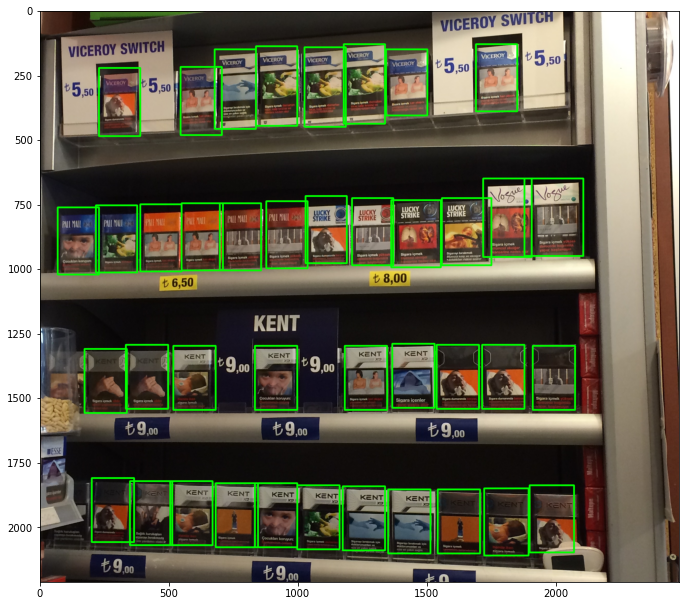

In [0]:
# draw one photo to check our data
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('C1_P10_N1_S4_1.JPG')

<a href="https://github.com/tensorflow/models/tree/master/research/deeplab">Tensorflow DeepLab</a> provides models for sematic segmentation. Other tasks could be implemented with <a href="https://github.com/tensorflow/models/tree/master/research/deeplab">Tensorflow Object Detection API</a>.<br/>
For packs detection we will use SSD Mobilenet V1 model pre-trained on the COCO dataset. Training a model from the beginning could take even days, so we use knowledge transfer technique training ready model on new types of objects.

<h2>Data Preparation</h2>
Cropping 6 random squares from each image and resize crops to 600x600 pictures.

In [0]:
# Using Tensorflow version 1.X
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import cv2
import pandas as pd
import numpy as np
import os
import io
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

In [0]:
# current images path 
img_path = 'data/images/ShelfImages/'
# cropped parts destination
cropped_path = 'data/images/detector/'
# Step 1 results path
data_path = 'data/'
# output destination
detector_data_path = 'pack_detector/data/'

In [0]:
# read rects and photos dataframes
photos = pd.read_pickle(f'{data_path}photos.pkl')
products = pd.read_pickle(f'{data_path}products.pkl')

In [0]:
N_CROP_TRIALS = 6
CROP_SIZE = 1000

In [0]:
# returns random value in [s, f]
def rand_between(s, f):
    if s == f:
        return s
    return np.random.randint(s, f)

In [0]:
train_products, eval_products = [], []
for img_file, is_train in photos[['file', 'is_train']].values:
    img = cv2.imread(f'{img_path}{img_file}')
    img_h, img_w, img_c = img.shape
    for n in range(N_CROP_TRIALS):
        # randomly crop square
        c_size = rand_between(300, max(img_h, img_w))
        x0 = rand_between(0, max(0, img_w - c_size))
        y0 = rand_between(0, max(0, img_h - c_size))
        x1 = min(img_w, x0 + c_size)
        y1 = min(img_h, y0 + c_size)
        # products totally inside crop rectangle
        crop_products = products[(products.file == img_file) & 
                                 (products.xmin > x0) & (products.xmax < x1) &
                                 (products.ymin > y0) & (products.ymax < y1)]
        # no products inside crop rectangle? cropping trial failed...
        if len(crop_products) == 0:
            continue
        # name the crop
        crop_img_file = f'{img_file[:-4]}{x0}_{y0}_{x1}_{y1}.JPG'
        # crop and reshape to CROP_SIZExCROP_SIZE or smaller 
        # keeping aspect ratio
        crop = img[y0:y1, x0:x1]
        h, w, c = crop.shape
        ratio = min(CROP_SIZE/h, CROP_SIZE/w)
        crop = cv2.resize(crop, (0,0), fx=ratio, fy=ratio)
        crop = crop[0:CROP_SIZE, 0:CROP_SIZE]
        h, w, c = crop.shape
        # add crop inner products to train_products or eval_products list
        for xmin, ymin, xmax, ymax in \
                crop_products[['xmin', 'ymin', 'xmax', 'ymax']].values:
            xmin -= x0
            xmax -= x0
            ymin -= y0
            ymax -= y0

            xmin, xmax, ymin, ymax = [int(np.round(e * ratio)) 
                                      for e in [xmin, xmax, ymin, ymax]]
            product = {'filename': crop_img_file, 'class':'pack', 
                       'width':w, 'height':h,
                       'xmin':xmin, 'ymin':ymin, 'xmax':xmax, 'ymax':ymax}
            if is_train:
                train_products.append(product)
            else:
                eval_products.append(product)
        # save crop top eval or train folder
        subpath = ['eval/', 'train/'][is_train]
        cv2.imwrite(f'{cropped_path}{subpath}{crop_img_file}', crop)

In [0]:
train_df = pd.DataFrame(train_products).set_index('filename')
eval_df = pd.DataFrame(eval_products).set_index('filename')

In [0]:
# at this point we have two folders with images and
# two dataframes with information about packs
train_df.head()

,class,width,height,xmin,ymin,xmax,ymax
filename,,,,,,,
C3_P03_N1_S4_1673_161_1042_530.JPG,pack,1000,1000,257,214,789,886
C3_P03_N1_S4_12376_799_2755_1178.JPG,pack,1000,1000,127,266,654,953
C3_P03_N1_S4_1290_5_2444_2159.JPG,pack,1000,1000,307,668,400,824
C3_P03_N1_S4_1290_5_2444_2159.JPG,pack,1000,1000,588,698,682,830
C3_P03_N1_S4_1290_5_2444_2159.JPG,pack,1000,1000,818,410,911,531


In [0]:
print(len(train_df), len(eval_df))

24010 11415


In [0]:
# example of training image
# IPythonImage(f'{cropped_path}train/{train_df.index.values[0]}', width=600)

<h2>Preparing Tensorflow Records</h2>
Convert everything to train.record and eval.record files that can be consumed by Tensorflow Object Detection trainer.

In [0]:
def class_text_to_int(row_label):
    if row_label == 'pack':
        return 1
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) 
            for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [0]:
def convert_to_tf_records(images_path, examples, dst_file):
    writer = tf.python_io.TFRecordWriter(dst_file)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, images_path)
        writer.write(tf_example.SerializeToString())
    writer.close()

In [0]:
convert_to_tf_records(f'{cropped_path}train/', train_df, f'{detector_data_path}train.record')
convert_to_tf_records(f'{cropped_path}eval/', eval_df, f'{detector_data_path}eval.record')

# <h2>Running Training Proccess</h2>

We have the pack_detector folder with the following content:
<ul>
    <li>+data<ul><li>train.record</li><li>eval.record</li><li>pack.pbtxt</li></ul></li>
    <li>+models<ul><li>+ssd_mobilenet_v1<ul><li>+train</li><li>+eval</li><li>ssd_mobilenet_v1_pack.config</li></ul></li>
</ul>
You can read the detailed description and purpose of these files here <a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_locally.md">Running Locally</a> and here <a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_pets.md">Quick Start: Training a pet detector</a>.<br/><br/>

In [0]:
# cloning tensorflow models repository
! git clone https://github.com/tensorflow/models.git 

Cloning into 'models'...
remote: Enumerating objects: 35092, done.
remote: Total 35092 (delta 0), reused 0 (delta 0), pack-reused 35092
Receiving objects: 100% (35092/35092), 512.76 MiB | 15.52 MiB/s, done.
Resolving deltas: 100% (22752/22752), done.


In [0]:
# copying config and pbtext files to appropriate folders
! cp pack.pbtxt pack_detector/data/
! cp ssd_mobilenet_da_20000.config pack_detector/models/ssd_mobilenet/

In [0]:
# copying main folder to tensorflow repo
%%shell
cp -r pack_detector models/research/object_detection

In [0]:
# downloading pretrained MobileNetV1 model
%%shell 
cd /content/models/research/object_detection

wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz

tar -xvzf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

In [0]:
# building package slim
%%shell 
cd /content/models/research/slim/;
python setup.py build
python setup.py install

In [0]:
# emptying train folder (needed if you want to retrain a model)
!rm -rf /content/models/research/object_detection/pack_detector/models/ssd_mobilenet/train/*

In [0]:
# starting model training
%%shell
cd /content/models/research/object_detection

python3 model_main.py --alsologtostderr --model_dir=pack_detector/models/ssd_mobilenet/train/ \
--pipeline_config_path=pack_detector/models/ssd_mobilenet/ssd_mobilenet_da_20000.config

In [0]:
# exporting the best checkpoint as a frozen graph for inference
%%shell
cd /content/models/research/object_detection

python export_inference_graph.py \
--input_type=image_tensor \
--pipeline_config_path=pack_detector/models/ssd_mobilenet/ssd_mobilenet_da_20000.config \
--trained_checkpoint_prefix=pack_detector/models/ssd_mobilenet/train/model.ckpt-33372 \
--output_directory=pack_detector/models/ssd_mobilenet/fg

In [0]:
# zipping the frozen graph
! zip -r  model.zip /content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg

  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/ (stored 0%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/model.ckpt.data-00000-of-00001 (deflated 7%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/model.ckpt.meta (deflated 93%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/saved_model/ (stored 0%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/saved_model/saved_model.pb (deflated 9%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/saved_model/variables/ (stored 0%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/model.ckpt.index (deflated 68%)
  adding: content/models/research/object_detection/pack_detector/models/ssd_mobilenet/fg/pipeline.config (deflated 69%)
  adding: content/models/research/o